# Analisis Survival Breast Cancer MSK 2025

Notebook ini melakukan analisis survival pada data breast cancer dari MSK 2025, termasuk preprocessing data, pemodelan Cox Proportional Hazards, dan analisis Kaplan-Meier.

## Data Preparation

In [1]:
import pandas as pd
# Import file .tsv
df = pd.read_csv('breast_msk_2025_clinical_data.tsv', sep='\t')

# Tampilkan nama kolom
print("Nama kolom:")
print(df.columns.tolist())

Nama kolom:
['Study ID', 'Patient ID', 'Sample ID', 'Cancer Type', 'Cancer Type Detailed', 'Ethnicity', 'Fraction Genome Altered', 'Sex', 'Gene Panel', 'Metastatic Site', 'MSI Comment', 'MSI Score', 'MSI Type', 'Mutation Count', 'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status', 'Primary Tumor Site', 'Race', 'Sample Class', 'Number of Samples Per Patient', 'Sample coverage', 'Sample Type', 'Somatic Status', 'Tumor Purity']


## Data Loading

## Data Cleaning and Preprocessing

In [2]:
# Data Preprocessing

# Cek nilai unik di kolom 'Sex'
print("Nilai unik di kolom 'Sex' sebelum cleaning:")
print(df['Sex'].unique())

# Standardize nilai di kolom 'Sex' ke 'Male' dan 'Female'
df['Sex'] = df['Sex'].str.capitalize()  # Capitalize untuk membuat Female dan Male

# Pastikan hanya Male dan Female, drop atau handle lainnya jika ada
df = df[df['Sex'].isin(['Male', 'Female'])]

print("Nilai unik di kolom 'Sex' setelah cleaning:")
print(df['Sex'].unique())

# Cek nilai unik di kolom 'Overall Survival Status' sebelum mapping
print("Nilai unik di kolom 'Overall Survival Status' sebelum mapping:")
print(df['Overall Survival Status'].unique())

# Mengubah nilai di kolom 'Overall Survival Status' (pindah ke sini)
df['Overall Survival Status'] = df['Overall Survival Status'].map({'1:DECEASED': 1, '0:LIVING': 0})

# Standardize nilai di kolom 'Primary Tumor Site' ke kapitalisasi konsisten
df['Primary Tumor Site'] = df['Primary Tumor Site'].str.capitalize()

# Tampilkan nilai unik setelah mapping untuk verifikasi
print("Nilai unik di kolom 'Overall Survival Status' setelah mapping:")
print(df['Overall Survival Status'].unique())

# Drop NaN di kolom yang diperlukan untuk analisis Cox dan KM
columns_needed = [
    'Overall Survival (Months)',
    'Overall Survival Status',
    'Sex',
    'Primary Tumor Site',
    'MSI Type',
    'Mutation Count',
    'Fraction Genome Altered'
]
df = df.dropna(subset=columns_needed)

print(f"Jumlah sampel setelah preprocessing: {len(df)}")

Nilai unik di kolom 'Sex' sebelum cleaning:
['FEMALE' 'Female' 'Male' 'Unknown' 'MALE']
Nilai unik di kolom 'Sex' setelah cleaning:
['Female' 'Male']
Nilai unik di kolom 'Overall Survival Status' sebelum mapping:
['1:DECEASED' '0:LIVING']
Nilai unik di kolom 'Overall Survival Status' setelah mapping:
[1 0]
Jumlah sampel setelah preprocessing: 3656


# Kaplan-Meier Survival Analysis

### Survival Curve by Sex

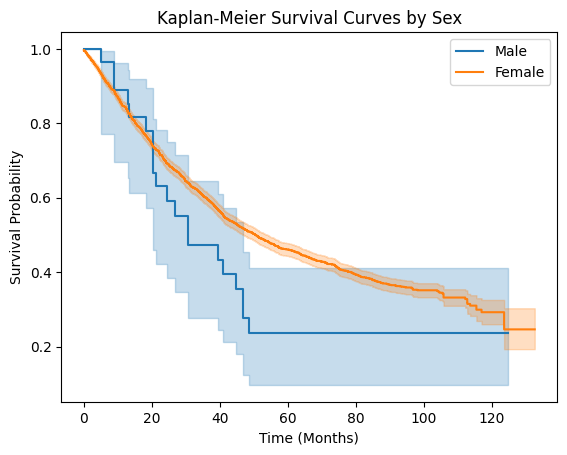

Jumlah Male: 30
Jumlah Female: 3626


In [3]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Buat Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Pisahkan data berdasarkan jenis kelamin
male = df[df['Sex'] == 'Male']
female = df[df['Sex'] == 'Female']

# Fit model untuk Male
kmf.fit(male['Overall Survival (Months)'], male['Overall Survival Status'], label='Male')
ax = kmf.plot()

# Fit model untuk Female
kmf.fit(female['Overall Survival (Months)'], female['Overall Survival Status'], label='Female')
kmf.plot(ax=ax)

# Tambahkan label dan judul
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Survival Curves by Sex')
plt.legend()
plt.show()

# Print jumlah sampel per kelompok
print(f"Jumlah Male: {len(male)}")
print(f"Jumlah Female: {len(female)}")

### Survival Curve by MSI Type

Nilai unik di kolom 'MSI Type':
['Stable' 'Indeterminate' 'Do not report' 'Instable']


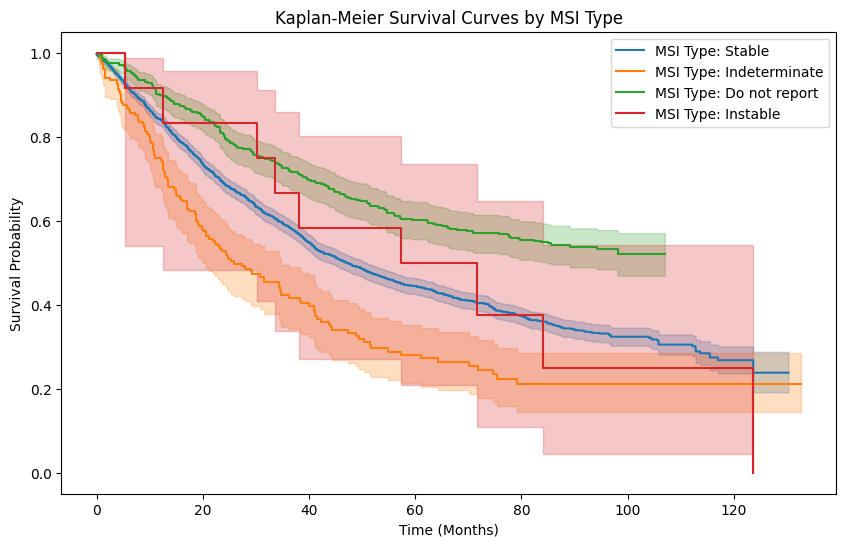


Jumlah sampel per MSI Type:
  Stable: 2926
  Indeterminate: 197
  Do not report: 520
  Instable: 13


In [4]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Buat Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Cek nilai unik MSI Type
print("Nilai unik di kolom 'MSI Type':")
print(df['MSI Type'].unique())

# Pisahkan data berdasarkan MSI Type
msi_groups = df['MSI Type'].unique()

# Buat plot
fig, ax = plt.subplots(figsize=(10, 6))

# Fit dan plot untuk setiap grup MSI Type
for msi_type in msi_groups:
    group_data = df[df['MSI Type'] == msi_type]
    kmf.fit(group_data['Overall Survival (Months)'], 
            group_data['Overall Survival Status'], 
            label=f'MSI Type: {msi_type}')
    kmf.plot(ax=ax)

# Tambahkan label dan judul
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Survival Curves by MSI Type')
plt.legend()
plt.show()

# Print jumlah sampel per kelompok
print("\nJumlah sampel per MSI Type:")
for msi_type in msi_groups:
    count = len(df[df['MSI Type'] == msi_type])
    print(f"  {msi_type}: {count}")

### Overall Survival Curve

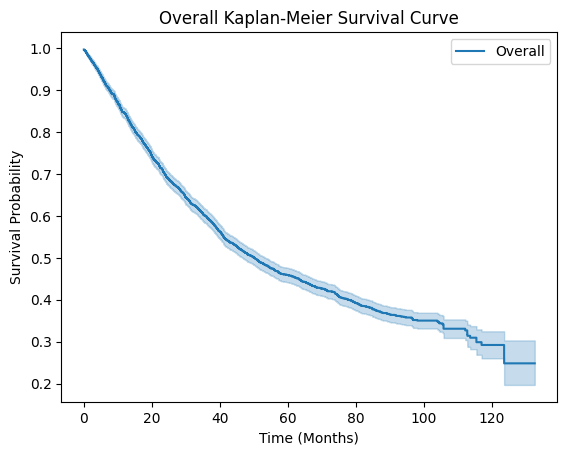

Median Survival Time (Overall): 50.13643686 months


In [5]:
# Overall Kaplan-Meier Survival Curve
kmf_overall = KaplanMeierFitter()
kmf_overall.fit(df['Overall Survival (Months)'], df['Overall Survival Status'], label='Overall')
kmf_overall.plot()
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.title('Overall Kaplan-Meier Survival Curve')
plt.show()

# Median survival time overall
median_overall = kmf_overall.median_survival_time_
print(f"Median Survival Time (Overall): {median_overall} months")

### Median Survival Times

In [6]:
# Median survival times per group
kmf_male = KaplanMeierFitter()
kmf_male.fit(male['Overall Survival (Months)'], male['Overall Survival Status'])

kmf_female = KaplanMeierFitter()
kmf_female.fit(female['Overall Survival (Months)'], female['Overall Survival Status'])

median_male = kmf_male.median_survival_time_
median_female = kmf_female.median_survival_time_

print(f"Median Survival Time (Male): {median_male} months")
print(f"Median Survival Time (Female): {median_female} months")
print(f"Median Survival Time (Overall): {median_overall} months")

Median Survival Time (Male): 30.70651281 months
Median Survival Time (Female): 50.39944768 months
Median Survival Time (Overall): 50.13643686 months


### Survival Probability at Specific Time

In [7]:
# Contoh: Probabilitas survival pada 12 bulan
time_point = 12  # Ganti dengan n bulan yang diinginkan

# Untuk overall
prob_overall = kmf_overall.predict(time_point)
print(f"Survival Probability at {time_point} months (Overall): {prob_overall}")

# Untuk Male
prob_male = kmf_male.predict(time_point)
print(f"Survival Probability at {time_point} months (Male): {prob_male}")

# Untuk Female
prob_female = kmf_female.predict(time_point)
print(f"Survival Probability at {time_point} months (Female): {prob_female}")

Survival Probability at 12 months (Overall): 0.8451867034300574
Survival Probability at 12 months (Male): 0.8901098901098903
Survival Probability at 12 months (Female): 0.844821080945139


### Life Table

In [8]:
### Kaplan-Meier Life Table at Specific Times (Overall)
time_points = [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60]

# Buat list untuk tabel
table_data = []
for time in time_points:
    survival_prob = kmf_overall.predict(time)
    at_risk = sum(df['Overall Survival (Months)'] >= time)
    deaths_cumulative = sum((df['Overall Survival (Months)'] <= time) & (df['Overall Survival Status'] == 1))
    table_data.append({
        'Time (Months)': time,
        'At Risk': at_risk,
        'Deaths (Observed, Cumulative)': deaths_cumulative,
        'Survival Probability': survival_prob
    })

# Buat DataFrame
life_table_specific = pd.DataFrame(table_data)

# Tampilkan tabel
print("Kaplan-Meier Life Table at Specific Times (Overall):")
life_table_specific

# save to excel
life_table_specific.to_excel('kaplan_meier_life_table_overall.xlsx', index=False)

Kaplan-Meier Life Table at Specific Times (Overall):


# Nelson Aalen

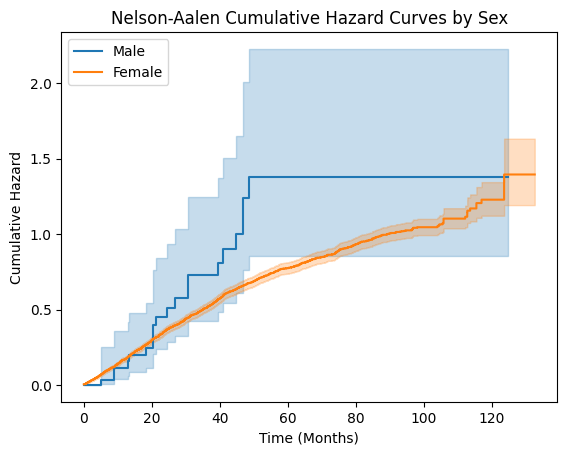

Cumulative Hazard Male at 50 months: 0.6868889250747214


In [9]:
from lifelines import NelsonAalenFitter
import matplotlib.pyplot as plt

# Buat Nelson-Aalen fitter
naf = NelsonAalenFitter()

# Pisahkan data berdasarkan jenis kelamin
male = df[df['Sex'] == 'Male']
female = df[df['Sex'] == 'Female']

# Fit dan plot cumulative hazard untuk Male
naf.fit(male['Overall Survival (Months)'], male['Overall Survival Status'], label='Male')
ax = naf.plot()

# Fit dan plot cumulative hazard untuk Female
naf.fit(female['Overall Survival (Months)'], female['Overall Survival Status'], label='Female')
naf.plot(ax=ax)

# Tambahkan label dan judul
plt.xlabel('Time (Months)')
plt.ylabel('Cumulative Hazard')
plt.title('Nelson-Aalen Cumulative Hazard Curves by Sex')
plt.legend()
plt.show()

# Untuk menampilkan nilai cumulative hazard pada waktu tertentu (misalnya, median survival)
# Ambil nilai pada waktu tertentu, contoh: pada 50 bulan
hazard_male_at_50 = naf.predict(50)  # Jika naf sudah fit untuk male
print(f"Cumulative Hazard Male at 50 months: {hazard_male_at_50}")
# Lakukan serupa untuk female

# Cox Regression

## Pemodelan Cox Regression

In [10]:
from lifelines import CoxPHFitter
import pandas as pd

# Pilih kolom yang diperlukan
columns_needed = [
    'Overall Survival (Months)',
    'Overall Survival Status',
    'Sex',
    'Primary Tumor Site',
    'MSI Type',
    'Mutation Count',
    'Fraction Genome Altered'
]

# Buat subset data (sudah drop NaN di preprocessing)
data_cox = df[columns_needed]

# Pastikan tipe data benar
data_cox['Overall Survival (Months)'] = data_cox['Overall Survival (Months)'].astype(float)
data_cox['Overall Survival Status'] = data_cox['Overall Survival Status'].astype(int)

# Encode kolom kategorikal ke dummy variables
categorical_cols = ['Primary Tumor Site', 'MSI Type', 'Sex']
data_cox_encoded = pd.get_dummies(data_cox, columns=categorical_cols, drop_first=True)

# Tampilkan info data setelah encoding
print(f"Jumlah sampel setelah encoding: {len(data_cox_encoded)}")
print("Kolom setelah encoding:")
print(data_cox_encoded.columns.tolist())

# Fit model Cox Proportional Hazards
cph = CoxPHFitter(penalizer=0.1)  # Tambahkan penalizer untuk mengatasi kolinearitas
cph.fit(data_cox_encoded, duration_col='Overall Survival (Months)', event_col='Overall Survival Status')

# Tampilkan summary model
print("\nSummary Model Cox:")
print(cph.summary)

Jumlah sampel setelah encoding: 3656
Kolom setelah encoding:
['Overall Survival (Months)', 'Overall Survival Status', 'Mutation Count', 'Fraction Genome Altered', 'Primary Tumor Site_Cancer of unknown primary', 'MSI Type_Indeterminate', 'MSI Type_Instable', 'MSI Type_Stable', 'Sex_Male']


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10972\233382060.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cox['Overall Survival (Months)'] = data_cox['Overall Survival (Months)'].astype(float)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10972\233382060.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cox['Overall Survival Status'] = data_cox['Overall Survival Status'].astype(int)



Summary Model Cox:
                                                  coef  exp(coef)  se(coef)  \
covariate                                                                     
Mutation Count                                0.012001   1.012074  0.002169   
Fraction Genome Altered                       1.299710   3.668235  0.109615   
Primary Tumor Site_Cancer of unknown primary  1.197586   3.312112  1.010590   
MSI Type_Indeterminate                        0.405847   1.500572  0.100883   
MSI Type_Instable                             0.117535   1.124721  0.323243   
MSI Type_Stable                               0.369159   1.446518  0.059364   
Sex_Male                                      0.269746   1.309632  0.213478   

                                              coef lower 95%  coef upper 95%  \
covariate                                                                      
Mutation Count                                      0.007751        0.016252   
Fraction Genome Altered     

In [11]:
# Lihat nilai unik di kolom kategorikal
print("Nilai unik di 'Primary Tumor Site':")
print(data_cox['Primary Tumor Site'].unique())

print("\nNilai unik di 'MSI Type':")
print(data_cox['MSI Type'].unique())

print("\nNilai unik di 'Sex':")
print(data_cox['Sex'].unique())

Nilai unik di 'Primary Tumor Site':
['Breast' 'Cancer of unknown primary']

Nilai unik di 'MSI Type':
['Stable' 'Indeterminate' 'Do not report' 'Instable']

Nilai unik di 'Sex':
['Female' 'Male']


## Assumption Testing

In [12]:
# Uji asumsi proportional hazards
print("\nUji Asumsi Proportional Hazards:")
try:
    results = cph.check_assumptions(data_cox_encoded, p_value_threshold=0.05)
    print(results)
except Exception as e:
    print(f"Error dalam uji asumsi: {e}")


Uji Asumsi Proportional Hazards:
Proportional hazard assumption looks okay.
[]


In [13]:
from lifelines.statistics import proportional_hazard_test

result_all = proportional_hazard_test(cph, data_cox_encoded, time_transform='rank')
print("Proportional Hazard Test for All Data (time_transform='rank'):")
print(result_all)

Proportional Hazard Test for All Data (time_transform='rank'):
<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 3656 total observations, 1609 right-censored observations>
         test_name = proportional_hazard_test

---
                                              test_statistic    p  -log2(p)
Fraction Genome Altered                                 0.00 0.99      0.01
MSI Type_Indeterminate                                  1.30 0.25      1.98
MSI Type_Instable                                       1.51 0.22      2.19
MSI Type_Stable                                         0.07 0.79      0.35
Mutation Count                                          0.36 0.55      0.86
Primary Tumor Site_Cancer of unknown primary            0.28 0.60      0.74
Sex_Male                                                0.53 0.47      1.10


In [14]:
# Concordance index
c_index = cph.concordance_index_
print(f"Concordance Index: {c_index}")

Concordance Index: 0.6075789259253961


## Baseline Hazard `h0`

In [15]:
# Ekstrak baseline hazard
baseline_hazard = cph.baseline_hazard_
print("Baseline Hazard Function h0(t):")
print(baseline_hazard)

Baseline Hazard Function h0(t):
            baseline hazard
0.000000           0.003131
0.065753           0.000539
0.098629           0.000540
0.131505           0.000540
0.164382           0.000270
...                     ...
129.302693         0.000000
129.434198         0.000000
130.223230         0.000000
130.288983         0.000000
132.656081         0.000000

[1858 rows x 1 columns]


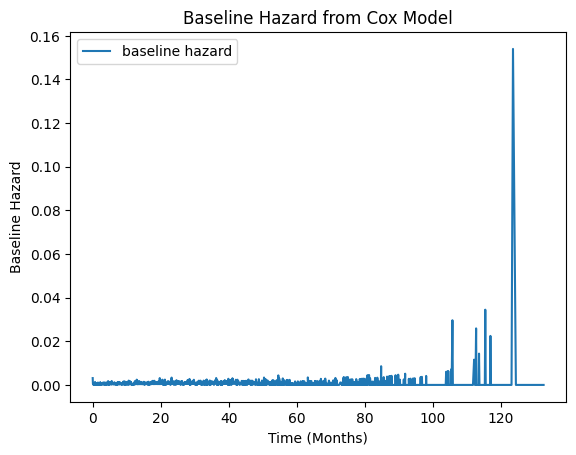

In [16]:
baseline_hazard.plot()
plt.xlabel('Time (Months)')
plt.ylabel('Baseline Hazard')
plt.title('Baseline Hazard from Cox Model')
plt.show()

In [17]:
# simpan baseline hazard ke file excel
baseline_hazard.to_excel('baseline_hazard.xlsx')

## Baseline Cumulative Hazard `HO`

In [18]:
# Ekstrak baseline hazard
baseline_cumulative = cph.baseline_cumulative_hazard_
print("Baseline Hazard Cumulative Function h0(t):")
print(baseline_cumulative)

Baseline Hazard Cumulative Function h0(t):
            baseline cumulative hazard
0.000000                      0.003131
0.065753                      0.003670
0.098629                      0.004210
0.131505                      0.004750
0.164382                      0.005020
...                                ...
129.302693                    1.407160
129.434198                    1.407160
130.223230                    1.407160
130.288983                    1.407160
132.656081                    1.407160

[1858 rows x 1 columns]


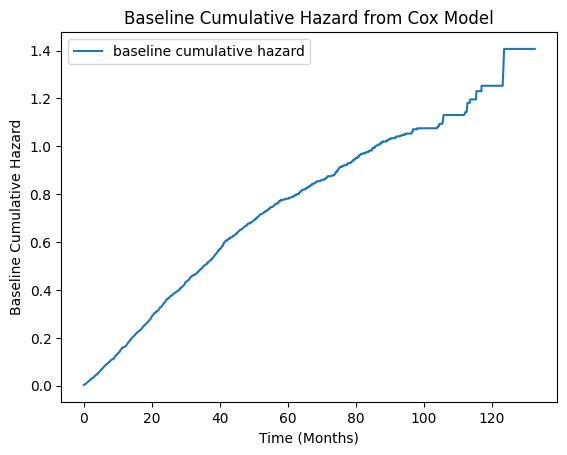

In [19]:
baseline_cumulative.plot()
plt.xlabel('Time (Months)')
plt.ylabel('Baseline Cumulative Hazard')
plt.title('Baseline Cumulative Hazard from Cox Model')
plt.show()

In [20]:
# simpan baseline hazard ke file excel
baseline_cumulative.to_excel('baseline_cumulative_hazard.xlsx')

## Conclusion

Analisis survival breast cancer MSK 2025 telah selesai, termasuk preprocessing data, pemodelan Cox Proportional Hazards, dan perbandingan kurva Kaplan-Meier berdasarkan jenis kelamin. Periksa hasil uji asumsi dan interpretasi model untuk wawasan lebih lanjut.